In [6]:
import pandas as pd
import numpy as np

In [8]:
iris = pd.read_csv(r"C:\Users\jmcha\OneDrive\Desktop\IRIS.csv")

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species       
4.9           3.1          1.5           0.1          Iris-setosa       3
5.8           2.7          5.1           1.9          Iris-virginica    2
4.3           3.0          1.1           0.1          Iris-setosa       1
4.4           3.2          1.3           0.2          Iris-setosa       1
4.5           2.3          1.3           0.3          Iris-setosa       1
                                                                       ..
7.7           2.6          6.9           2.3          Iris-virginica    1
              2.8          6.7           2.0          Iris-virginica    1
              3.0          6.1           2.3          Iris-virginica    1
              3.8          6.7           2.2          Iris-virginica    1
7.9           3.8          6.4           2.0          Iris-virginica    1
Name: count, Length: 147, dtype: int64

In [13]:
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [14]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

visualize the data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

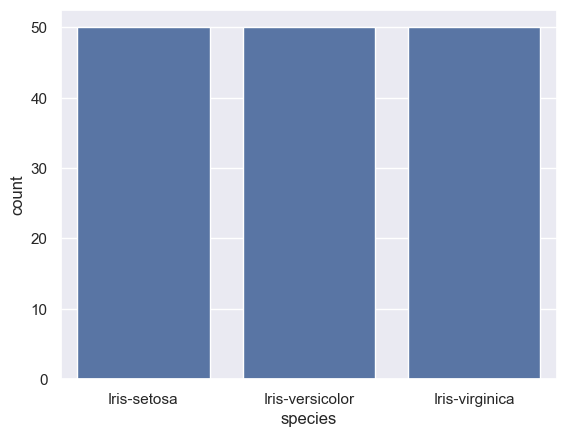

In [17]:
sns.countplot(x = 'species', data = iris,  )

<Axes: title={'center': 'species count'}, ylabel='species'>

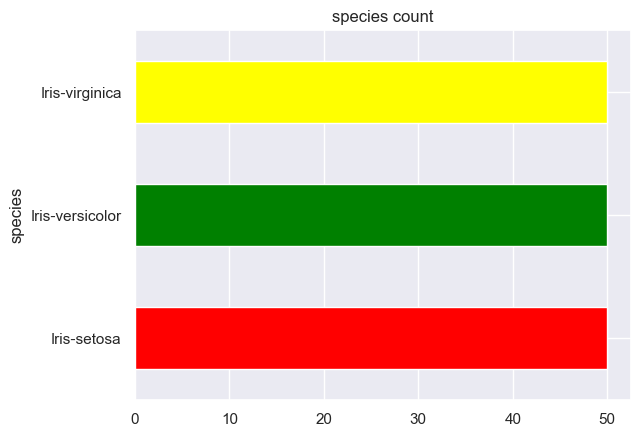

In [18]:
iris['species'].value_counts().plot(kind='barh', color=['red','green','yellow'], title='species count')

<Axes: xlabel='species', ylabel='petal_length'>

C:\Users\jmcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


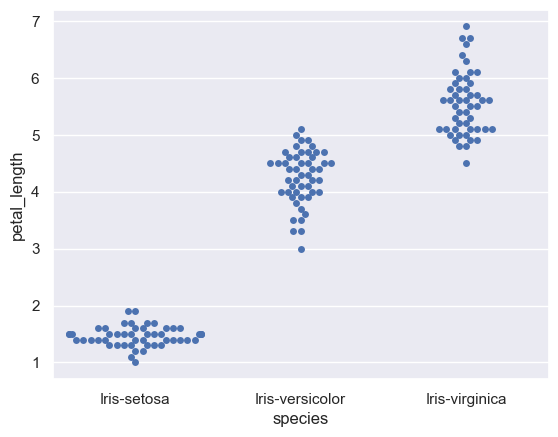

In [19]:
sns.swarmplot(x= 'species', y='petal_length', data = iris)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

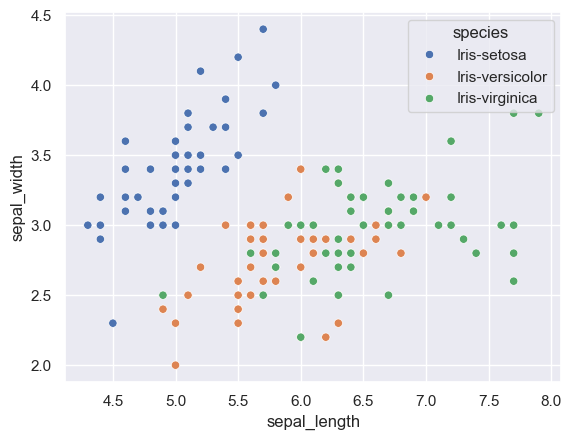

In [20]:
sns.scatterplot(x ='sepal_length', y = 'sepal_width', hue ='species', data = iris)

Model training and development

In [21]:
iris.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace = True)

C:\Users\jmcha\AppData\Local\Temp\ipykernel_19268\2415478778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace = True)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = iris.drop(columns='species', axis= 1 )

In [24]:
y = iris['species']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=4)

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [27]:
LR.fit(x_train,y_train)

C:\Users\jmcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report 

In [29]:
y_pred = LR.predict(x_test)
acc_LR = accuracy_score(y_pred, y_test)
print(acc_LR)

0.9736842105263158


In [30]:
from sklearn import metrics

In [31]:
score = round(LR.score(x_test, y_test)*100,2)
score

97.37

In [32]:
cls_report = classification_report(y_pred, y_test)

In [35]:
# trying another model

In [36]:
print('accuracy score for the logistic regression model is:', score)

print('classification report for our model is:', cls_report)

accuracy score for the logistic regression model is: 97.37
classification report for our model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38



In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [39]:
y_pred_svc = svc.predict(x_test)
acc_svc = accuracy_score(y_pred_svc,y_test)
score_svc = round(svc.score(x_test, y_test)*100,2)
score_svc

97.37

In [40]:
cls_svc = classification_report(y_pred_svc, y_test)

In [41]:

print('accuracy score of svc model is :', acc_svc)
print('classification report of svc model is:', cls_svc)

accuracy score of svc model is : 0.9736842105263158
classification report of svc model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38



In [42]:
# predicting values from the dataset
print(x)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [43]:
LR.predict([[6.7, 3.0, 5.2, 2.3]])
svc.predict([[6.7, 3.0, 5.2, 2.3]])

C:\Users\jmcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jmcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [45]:
# we have pretty good models ready for the classification with good enough accuracy score